In [2]:
#importing sample_superstore data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df =pd.read_csv('sample_superstore.csv',encoding='latin-1')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [3]:
1# Summary Statistics
summary_stats = df[['Sales', 'Quantity', 'Discount', 'Profit']].describe()
summary_stats

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858022,3.789574,0.156203,28.656896
std,623.245131,2.225110,0.206452,234.260108
min,0.440000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


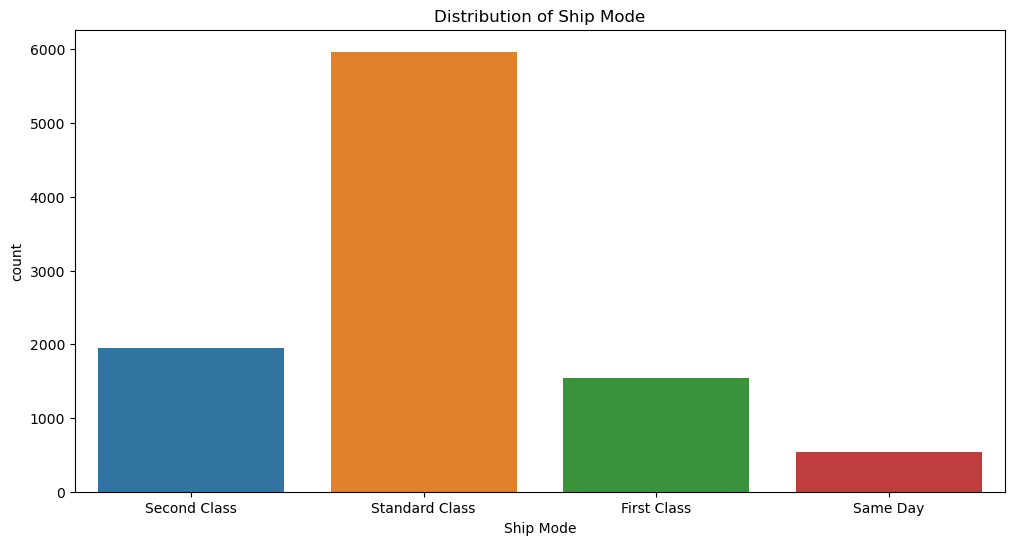

In [4]:
#b distribution of the ship mode
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Ship Mode')
plt.title('Distribution of Ship Mode')
plt.xlabel('Ship Mode')
plt.show()


In [5]:
# Ship Mode summary statistics
ship_mode_summary = df['Ship Mode'].value_counts()
print("Ship Mode Summary Statistics:")
print(ship_mode_summary)
print('#According to the data is shows most clients preffered the standard class ship mode whereas same day was the least preffered')

Ship Mode Summary Statistics:
Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64
#According to the data is shows most clients preffered the standard class ship mode whereas same day was the least preffered


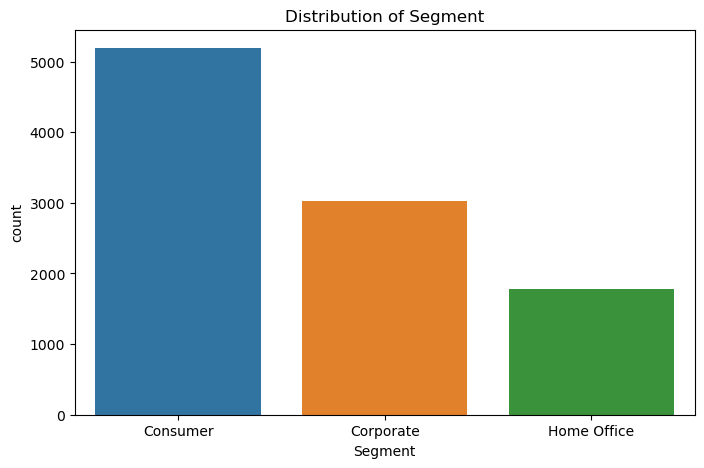

In [6]:
#DISTRIBUTION OF THE SEGMENTS
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Segment')
plt.title('Distribution of Segment')
plt.xlabel('Segment')
plt.show()


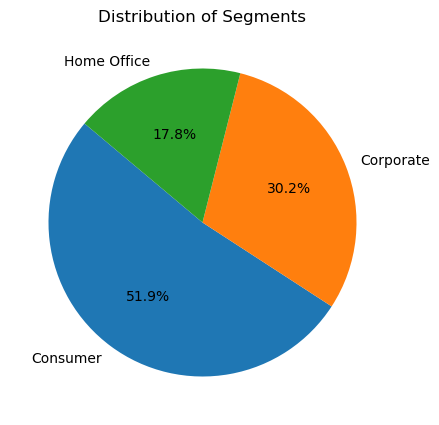

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64
There is high demand for consumer merchadise as compared to all other categories


In [7]:
segment_summary =df['Segment'].value_counts()
segment_summary
plt.figure(figsize=(8, 5))
plt.pie(segment_summary, labels=segment_summary.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Segments")
plt.show()

# Use .value-count() to get segement distribution.
segment_summary = df['Segment'].value_counts()
print(segment_summary)
print('There is high demand for consumer merchadise as compared to all other categories' )



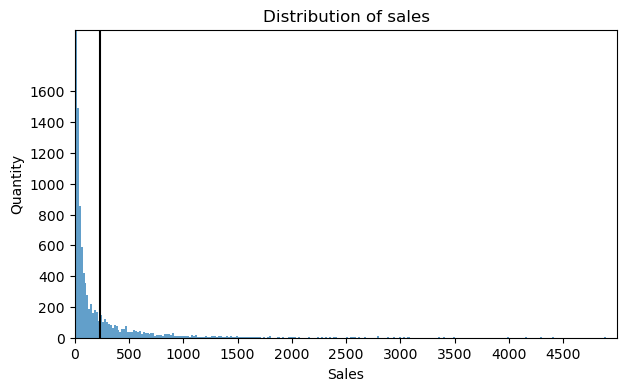

In [8]:
#distribution of sales
m_sales=df['Sales']
#calculate the mean of the list
mean_sales = np.mean(df['Sales'].to_numpy())


fig, ax = plt.subplots(figsize=(7, 4))
ax.hist(m_sales, bins='auto', alpha=0.7)
ax.axvline(mean_sales, color='black')
ax.set_xlabel('Sales')
ax.set_ylabel('Quantity')
ax.set_title('Distribution of sales')
ax.set_ylim(0, 2000)
ax.set_yticks(np.arange(0, 1800,200))
ax.set_xlim(0, 5000)  # Adjust the limits as needed
ax.set_xticks(np.arange(0, 5000, 500))  # Customize the tick marks as needed
plt.show()
# the mean is at 229.85

In [9]:
sales_median =np.median(df['Sales'].to_numpy())
sales_std= np.std(df['Sales'].to_numpy())
print("the Mean is:", mean_sales)
print("the Median is:",sales_median)
print('The Standatd deviation is:',sales_std)
print('The distribution has a long tail to the right. This is a right skewed distribution')

the Mean is: 229.85802181308784
the Median is: 54.489999999999995
The Standatd deviation is: 623.2139491099653
The distribution has a long tail to the right. This is a right skewed distribution


In [17]:
#2 EXPLORE THE DIFFERENCES BETWEEN THE SUBSETS AND DEMONSTRATE HOW THEY IMPACT THE DISTRIBUTION OF SALES
grouped_data = df.groupby(["Quantity", "City"])

# Create subsets based on Quantity and City
subsets = {}
for group, subset_data in grouped_data:
    quantity, city = group
    subset_key = f"Quantity_{quantity}_City_{city}"
    subsets[subset_key] = subset_data

# Accessing a specific subset, for example:
subset_key = "Quantity_5_City_Albuquerque"
subset = subsets.get(subset_key)

# Print the first few rows of the subset
if subset is not None:
    print(f"Subset '{subset_key}':")
    print(subset.head())
else:
    print(f"Subset '{subset_key}' not found.")
    print(subset_data.head())
    
    
    

Subset 'Quantity_5_City_Albuquerque':
      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
2416    2417  CA-2017-168655 2017-10-12 2017-10-18  Standard Class   
3066    3067  CA-2017-106859 2017-03-13 2017-03-18    Second Class   
8097    8098  CA-2017-122798 2017-12-28 2018-01-01  Standard Class   

     Customer ID      Customer Name      Segment        Country         City  \
2416    ML-18040  Michelle Lonsdale    Corporate  United States  Albuquerque   
3066    BF-11215    Benjamin Farhat  Home Office  United States  Albuquerque   
8097    SV-20935    Susan Vittorini     Consumer  United States  Albuquerque   

      ... Region       Product ID         Category Sub-Category  \
2416  ...   West  TEC-AC-10002842       Technology  Accessories   
3066  ...   West  TEC-AC-10004001       Technology  Accessories   
8097  ...   West  OFF-ST-10003058  Office Supplies      Storage   

                                           Product Name   Sales Quantity  \
2416  WD My Pas

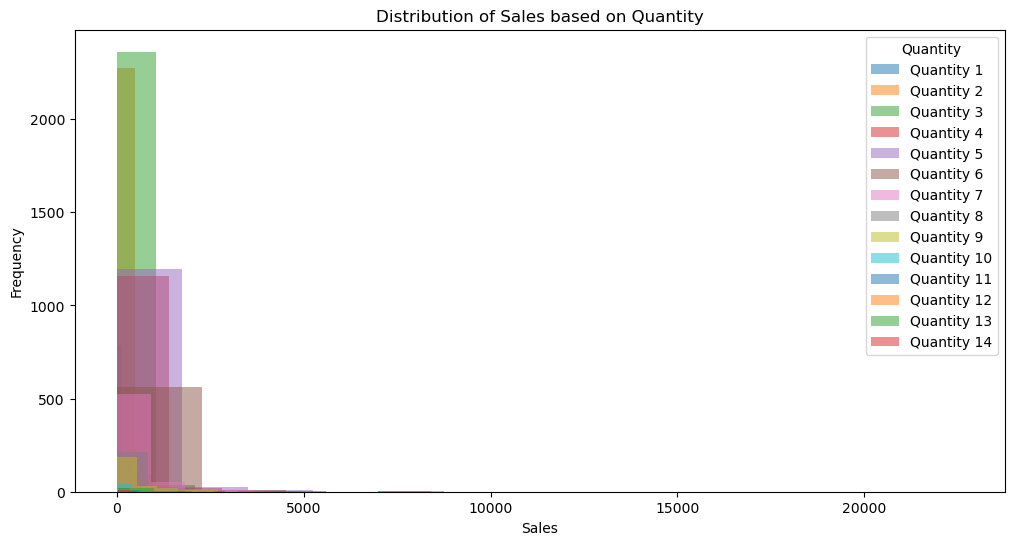

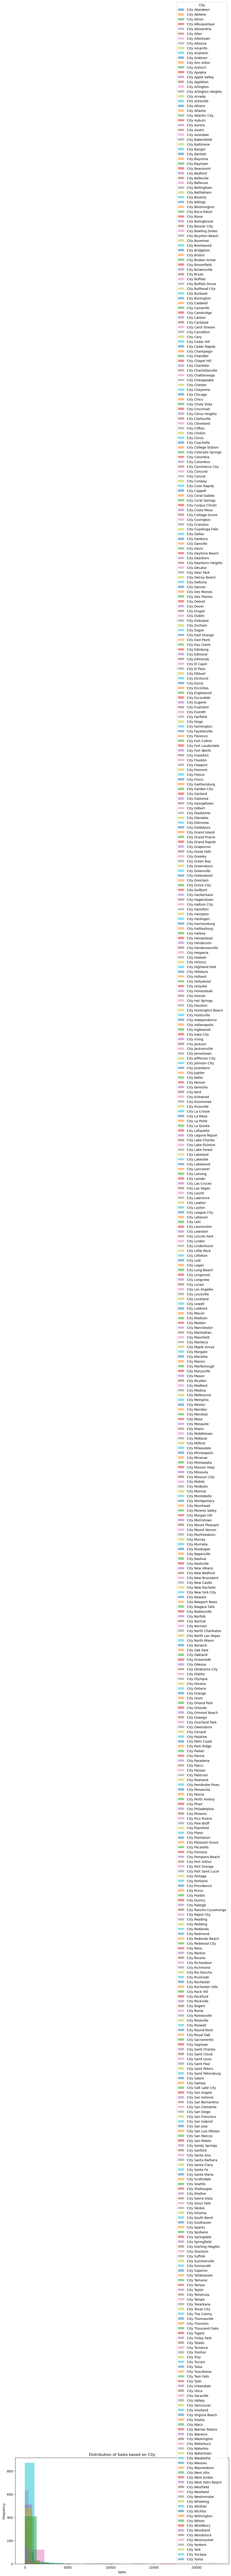

In [18]:
#Explaining split 
df = pd.DataFrame(df)

# Split data based on Quantity
quantity_groups = df.groupby('Quantity')

# Plot the distribution of Sales for each Quantity group
plt.figure(figsize=(12, 6))
for quantity, group in quantity_groups:
    plt.hist(group['Sales'], alpha=0.5, label=f'Quantity {quantity}')

plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.legend(title='Quantity')
plt.title('Distribution of Sales based on Quantity')
plt.show()

# Split data based on City
city_groups = df.groupby('City')
# Plot the distribution of Sales for each City group
plt.figure(figsize=(12, 6))
for city, group in city_groups:
    plt.hist(group['Sales'], alpha=0.5, label=f'City {city}')

plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.legend(title='City')
plt.title('Distribution of Sales based on City')
plt.show()

In [12]:
# •	Explore correlations - Find the features that have the strongest positive and negative correlations with Sales
numeric_data = df.select_dtypes(include='number')
correlation = numeric_data.corr()
correlation_with_sales = correlation['Sales'].sort_values(ascending=False)

# Feature with the strongest positive correlation
strongest_positive_correlation_feature = correlation_with_sales.index[1]

# Feature with the strongest negative correlation
strongest_negative_correlation_feature = correlation_with_sales.index[-1]

print("Strongest positive correlation feature:", strongest_positive_correlation_feature)
print("Strongest negative correlation feature:", strongest_negative_correlation_feature)
print("we identified two variables that relate closely to sales which are profit and  discounts.The correlation on sales and profit is a weak positive correlation.However on sales and discounts the negative correlation was insignificant.")

Strongest positive correlation feature: Profit
Strongest negative correlation feature: Discount
we identified two variables that relate closely to sales which are profit and  discounts.The correlation on sales and profit is a weak positive correlation.However on sales and discounts the correlation was insignificant.


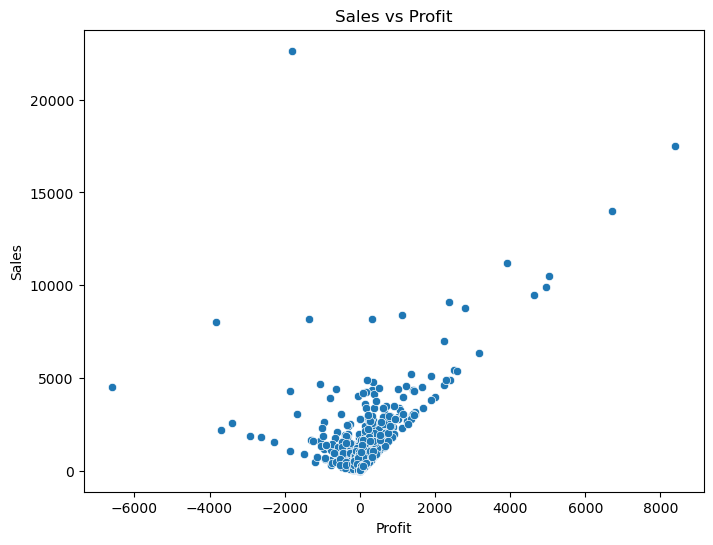

In [13]:
#Create a scatter plot for the feature with the strongest positive correlation
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x=strongest_positive_correlation_feature, y='Sales')
plt.title(f'Sales vs {strongest_positive_correlation_feature}')
plt.xlabel(strongest_positive_correlation_feature)
plt.ylabel('Sales')
plt.show()

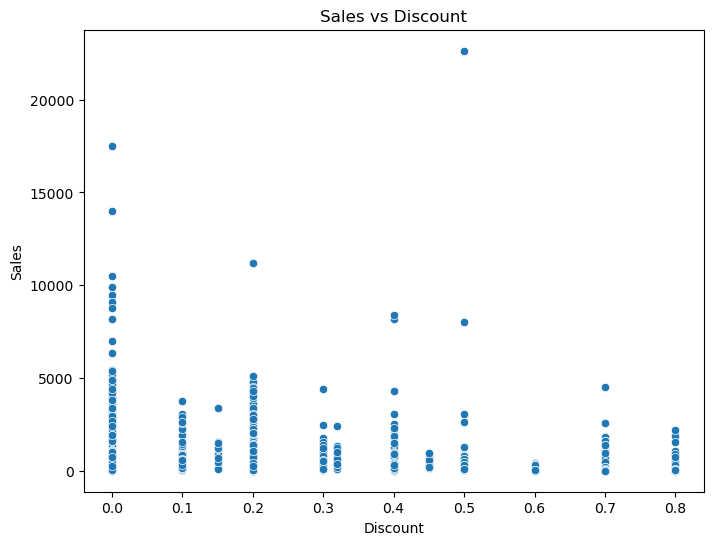

In [14]:
# Create a scatter plot for the feature with the strongest negative correlation
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x=strongest_negative_correlation_feature, y='Sales')
plt.title(f'Sales vs {strongest_negative_correlation_feature}')
plt.xlabel(strongest_negative_correlation_feature)
plt.ylabel('Sales')
plt.show()

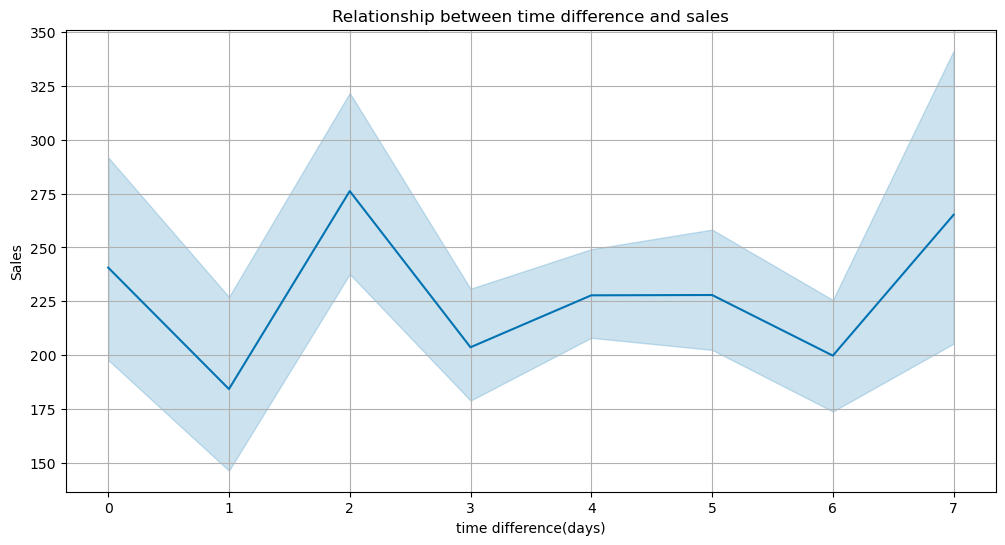

'There is no relationship whatsoever between the number of days taken to ship the merchadise and the sales'

In [35]:
#4. Explore the difference between two significant columns 
# convert "order date" and 'ship date'to datetime objects
df['Order Date'] =pd.to_datetime(df['Order Date'])
df['Ship Date']=pd.to_datetime(df['Ship Date'])
#to calculate the time difference
df['time_difference']=(df['Ship Date'] - df['Order Date']).dt.days
#create a line chart to visualize the relationship between time difference and sales over time
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='time_difference',y='Sales')
plt.title('Relationship between time difference and sales')   
plt.xlabel('time difference(days)')
plt.ylabel('Sales')
plt.grid('true')
plt.show()
('There is no relationship whatsoever between the number of days taken to ship the merchadise and the sales')

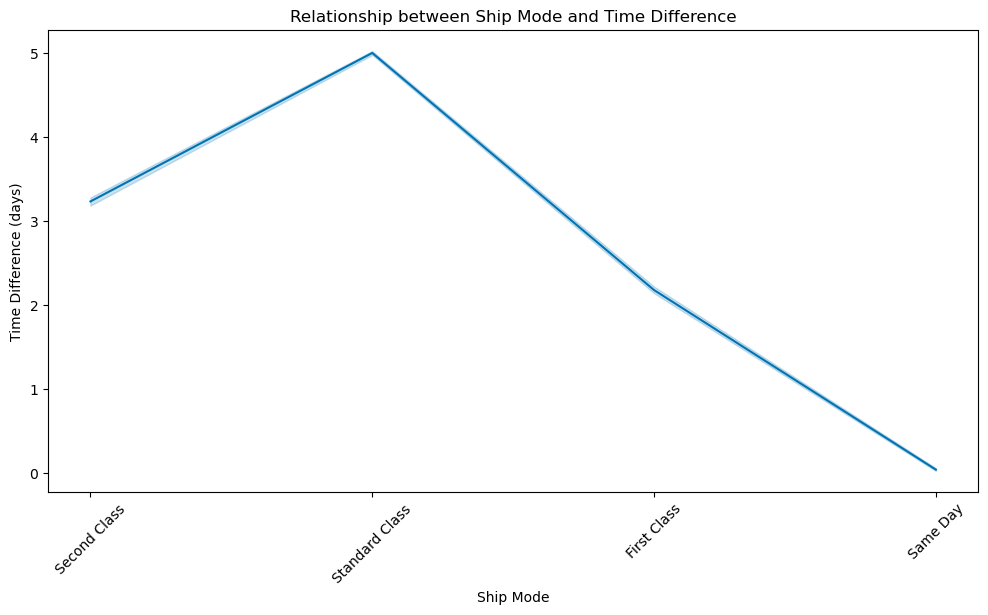

In [33]:
# The graph shows the number of maximum no of days taken in each ship mode. This helps to understand if there is any relationship between 
#the number of days taken to deliver and the sales

# Create a line graph using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Ship Mode', y='time_difference')
plt.title('Relationship between Ship Mode and Time Difference')
plt.xlabel('Ship Mode')
plt.ylabel('Time Difference (days)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()